In [188]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [189]:
df = pd.read_csv("data_a/veriseti_20220203_olimpiyatlar.csv")

In [190]:
df.head()

,ID,Name,Gender,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [191]:
df.columns

Index(['ID', 'Name', 'Gender', 'Age', 'Height', 'Weight', 'Team', 'NOC',
       'Games', 'Year', 'Season', 'City', 'Sport', 'Event', 'Medal'],
      dtype='object')

In [192]:
df.columns = ["id","isim","cinsiyet","yas","boy","kilo","takım","ülke","oyun","yıl","sezon","sehir","spor","etkinlik","madalya"]
#df.rename

In [193]:
df.head()

,id,isim,cinsiyet,yas,boy,kilo,takım,ülke,oyun,yıl,sezon,sehir,spor,etkinlik,madalya
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [194]:
df = df.drop(columns=["id"],axis=1)

In [195]:
df

,isim,cinsiyet,yas,boy,kilo,takım,ülke,oyun,yıl,sezon,sehir,spor,etkinlik,madalya
0,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN
271112,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
271113,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
271114,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN


In [196]:
essiz_etkinlik = pd.unique(df.etkinlik)
print(len(essiz_etkinlik))
essiz_etkinlik[:5]

765


array(["Basketball Men's Basketball", "Judo Men's Extra-Lightweight",
       "Football Men's Football", "Tug-Of-War Men's Tug-Of-War",
       "Speed Skating Women's 500 metres"], dtype=object)

In [197]:
df.isnull().sum()

isim             0
cinsiyet         0
yas           9474
boy          60171
kilo         62875
takım            0
ülke             0
oyun             0
yıl              0
sezon            0
sehir            0
spor             0
etkinlik         0
madalya     231333
dtype: int64

In [198]:
# for boy ve  kilo NoN values

In [199]:
veri = df.copy()
boy_kilo_list=["boy","kilo"]

for i in essiz_etkinlik:
    etkinlik_filtre = veri.etkinlik == i 
    veri_filtreli = veri[etkinlik_filtre]
    #rint(veri_filtreli)
    for s in boy_kilo_list:
        ortalama = np.round(np.mean(veri_filtreli[s]),2)
        if ~np.isnan(ortalama):# etkinlik özelinde ortalama varsa
            veri_filtreli[s]=veri_filtreli[s].fillna(ortalama)
        else:#etkinlik özelinde ortalama yoksa
            tum_ortalama = np.round(np.mean(veri[s]),2)
            veri_filtreli[s]=veri_filtreli[s].fillna(tum_ortalama)
    veri[etkinlik_filtre]=veri_filtreli
veri_1 = veri.copy()
veri.info
        

C:\Users\berka\AppData\Local\Temp\ipykernel_6876\2917758919.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  veri_filtreli[s]=veri_filtreli[s].fillna(ortalama)
C:\Users\berka\AppData\Local\Temp\ipykernel_6876\2917758919.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  veri_filtreli[s]=veri_filtreli[s].fillna(tum_ortalama)


<bound method DataFrame.info of                             isim cinsiyet   yas     boy   kilo  \
0                      A Dijiang        M  24.0  180.00  80.00   
1                       A Lamusi        M  23.0  170.00  60.00   
2            Gunnar Nielsen Aaby        M  24.0  177.48  73.09   
3           Edgar Lindenau Aabye        M  34.0  182.48  95.62   
4       Christine Jacoba Aaftink        F  21.0  185.00  82.00   
...                          ...      ...   ...     ...    ...   
271111                Andrzej ya        M  29.0  179.00  89.00   
271112                  Piotr ya        M  27.0  176.00  59.00   
271113                  Piotr ya        M  27.0  176.00  59.00   
271114        Tomasz Ireneusz ya        M  30.0  185.00  96.00   
271115        Tomasz Ireneusz ya        M  34.0  185.00  96.00   

                 takım ülke         oyun   yıl   sezon           sehir  \
0                China  CHN  1992 Summer  1992  Summer       Barcelona   
1                China  CHN

In [200]:
veri_1.head()

,isim,cinsiyet,yas,boy,kilo,takım,ülke,oyun,yıl,sezon,sehir,spor,etkinlik,madalya
0,A Dijiang,M,24.0,180.00,80.00,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,A Lamusi,M,23.0,170.00,60.00,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,Gunnar Nielsen Aaby,M,24.0,177.48,73.09,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,Edgar Lindenau Aabye,M,34.0,182.48,95.62,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,Christine Jacoba Aaftink,F,21.0,185.00,82.00,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [201]:
veri_1.isnull().sum()

isim             0
cinsiyet         0
yas           9474
boy              0
kilo             0
takım            0
ülke             0
oyun             0
yıl              0
sezon            0
sehir            0
spor             0
etkinlik         0
madalya     231333
dtype: int64

In [202]:
ortalama_yas = np.round(np.mean(veri_1.yas),2)
veri_1.yas = veri_1.yas.fillna(ortalama_yas)
#veri_1["yas"] = veri_1["yas"].fillna(ortalama_yas)

In [203]:
veri_1.head()

,isim,cinsiyet,yas,boy,kilo,takım,ülke,oyun,yıl,sezon,sehir,spor,etkinlik,madalya
0,A Dijiang,M,24.0,180.00,80.00,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,A Lamusi,M,23.0,170.00,60.00,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,Gunnar Nielsen Aaby,M,24.0,177.48,73.09,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,Edgar Lindenau Aabye,M,34.0,182.48,95.62,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,Christine Jacoba Aaftink,F,21.0,185.00,82.00,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [204]:
veri_1.isnull().sum()

isim             0
cinsiyet         0
yas              0
boy              0
kilo             0
takım            0
ülke             0
oyun             0
yıl              0
sezon            0
sehir            0
spor             0
etkinlik         0
madalya     231333
dtype: int64

In [205]:
# Madalya alamayanları veri setinden çıkarıcaz
veri_1["madalya"].isnull().sum()

231333

In [206]:
veri_1 = veri_1.dropna(subset=["madalya"],axis=0)

In [207]:
veri_1.info

<bound method DataFrame.info of                                        isim cinsiyet   yas     boy   kilo  \
3                      Edgar Lindenau Aabye        M  34.0  182.48  95.62   
37                     Arvo Ossian Aaltonen        M  30.0  182.01  76.69   
38                     Arvo Ossian Aaltonen        M  30.0  177.00  75.00   
40                 Juhamatti Tapio Aaltonen        M  28.0  184.00  85.00   
41                  Paavo Johannes Aaltonen        M  28.0  175.00  64.00   
...                                     ...      ...   ...     ...    ...   
271078  Galina Ivanovna Zybina (-Fyodorova)        F  25.0  168.00  80.00   
271080  Galina Ivanovna Zybina (-Fyodorova)        F  33.0  168.00  80.00   
271082                         Bogusaw Zych        M  28.0  182.00  82.00   
271102            Olesya Nikolayevna Zykina        F  19.0  171.00  64.00   
271103            Olesya Nikolayevna Zykina        F  23.0  171.00  64.00   

                 takım ülke         oyun   

In [208]:
veri_1.head()

,isim,cinsiyet,yas,boy,kilo,takım,ülke,oyun,yıl,sezon,sehir,spor,etkinlik,madalya
3,Edgar Lindenau Aabye,M,34.0,182.48,95.62,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
37,Arvo Ossian Aaltonen,M,30.0,182.01,76.69,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
38,Arvo Ossian Aaltonen,M,30.0,177.00,75.00,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze
40,Juhamatti Tapio Aaltonen,M,28.0,184.00,85.00,Finland,FIN,2014 Winter,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze
41,Paavo Johannes Aaltonen,M,28.0,175.00,64.00,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze


In [209]:
veri_1.to_csv("olimpiyatlar_clean",index=False)

In [210]:
def plot_histogram(degisken):
    plt.figure(figsize=(12,8))
    plt.hist(veri_1[degisken],bins = 85,color="red")
    plt.xlabel(degisken)
    plt.ylabel("Frekans")
    plt.title("Veri Sıklıgı {}".format(degisken))
    plt.show()

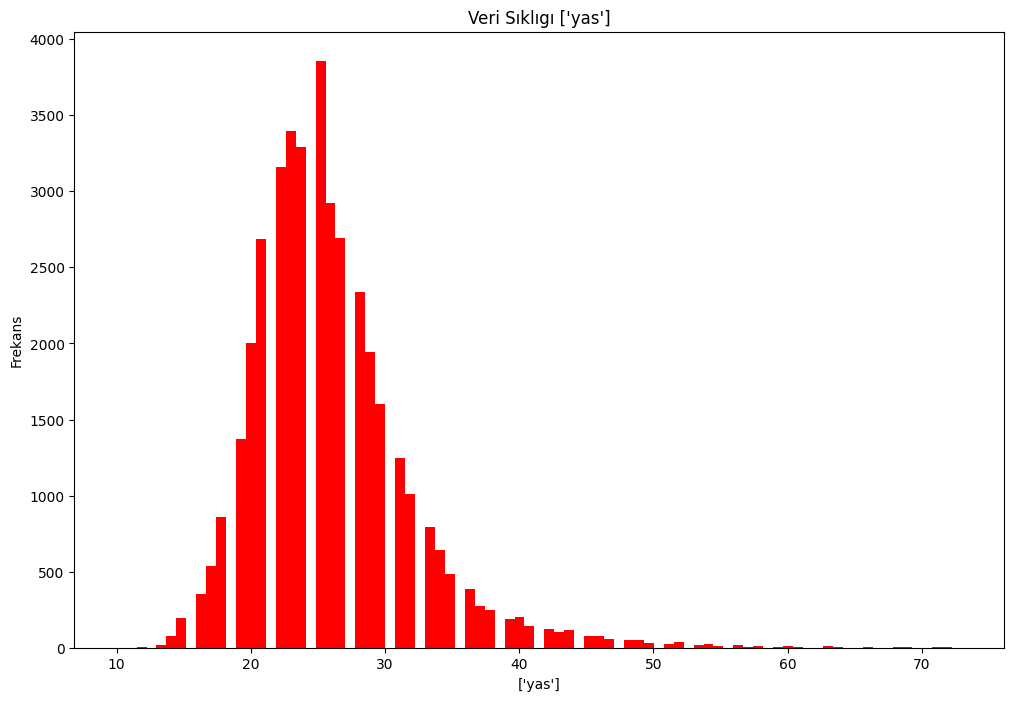

In [211]:
plot_histogram(["yas"])

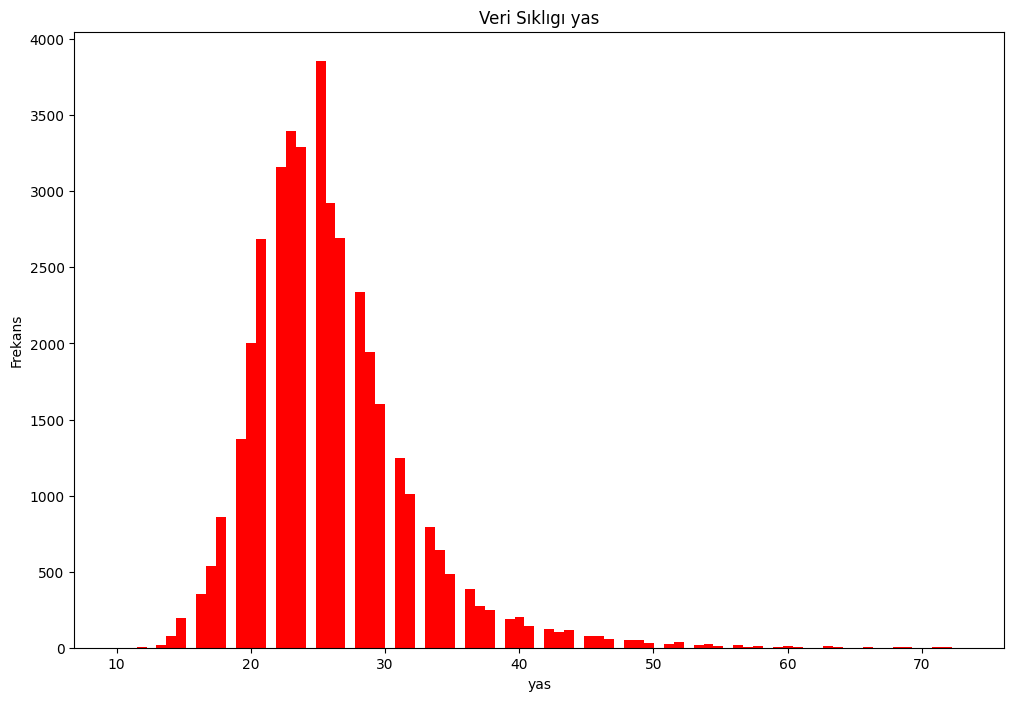

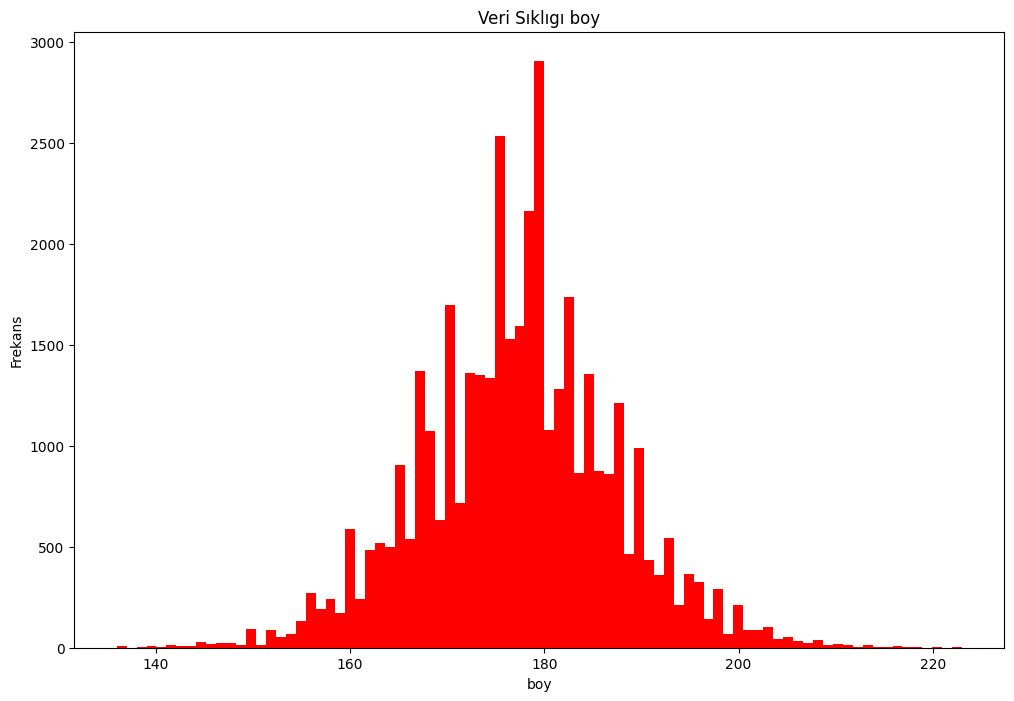

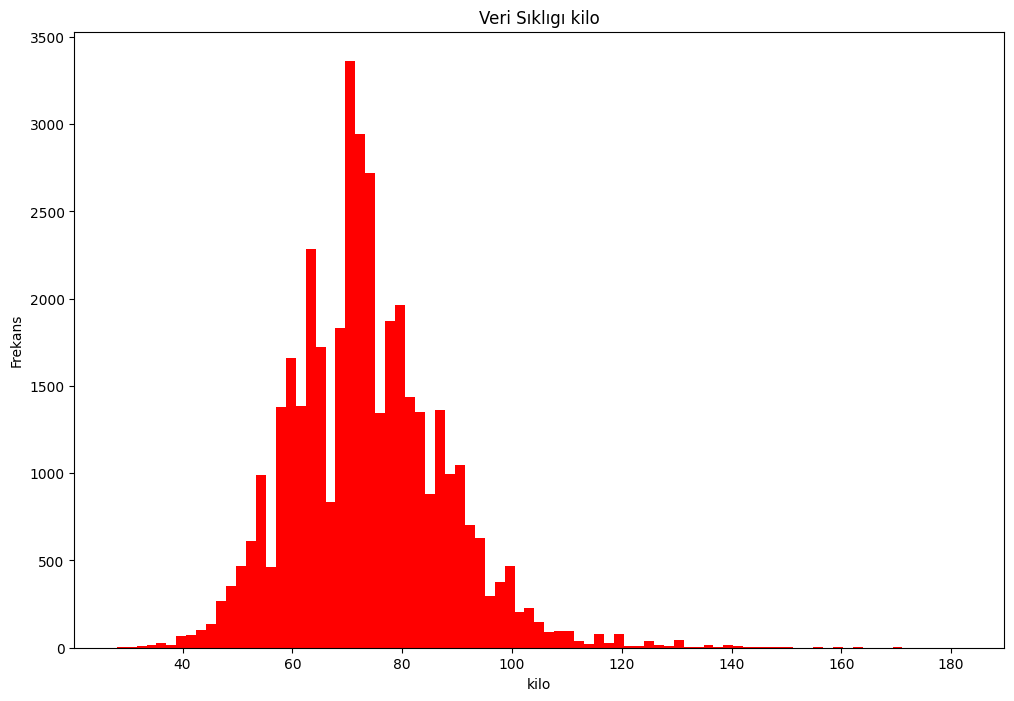

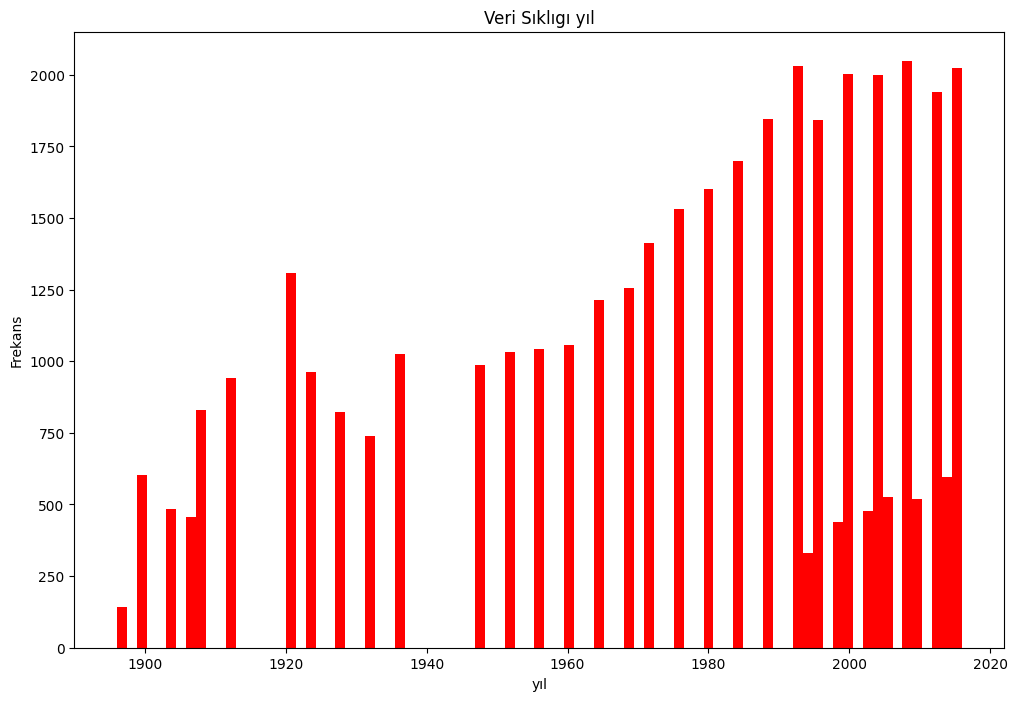

In [212]:
numeric = ["yas","boy","kilo","yıl"]

for i in numeric:
    plot_histogram(i)

In [213]:
veri_1.describe().T

,count,mean,std,min,25%,50%,75%,max
yas,39783.0,25.918456,5.859569,10.0,22.0,25.00,29.0,73.0
boy,39783.0,177.337864,10.169900,136.0,170.0,177.48,184.0,223.0
kilo,39783.0,73.751840,13.976279,28.0,64.0,73.00,82.0,182.0
yıl,39783.0,1973.943845,33.822857,1896.0,1952.0,1984.00,2002.0,2016.0


In [214]:
def boxplot_n(degiskenn):
    plt.figure()
    plt.boxplot(veri_1[degiskenn])
    plt.xlabel(degiskenn)
    plt.ylabel("Frekans")
    plt.title("Boxplot {}".format(degiskenn))
    plt.show()
    

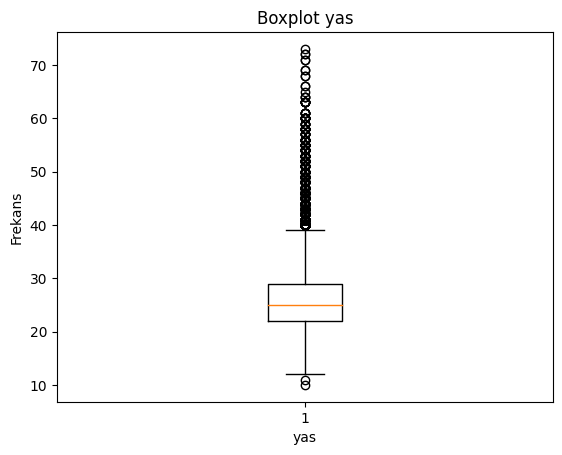

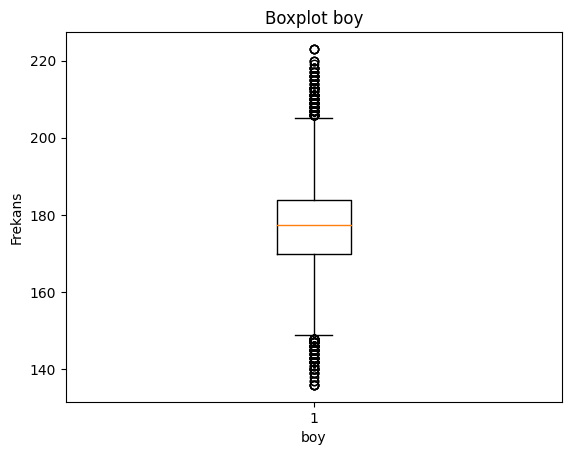

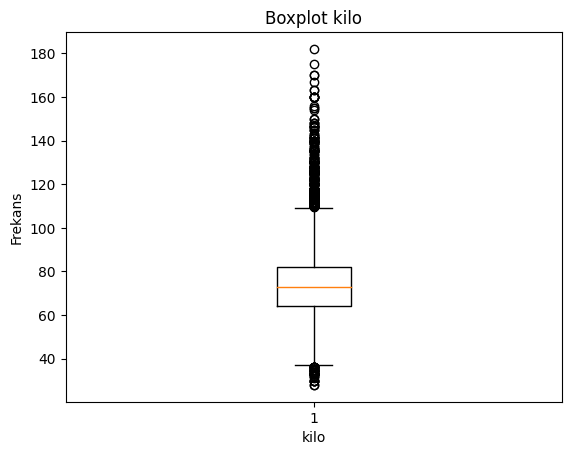

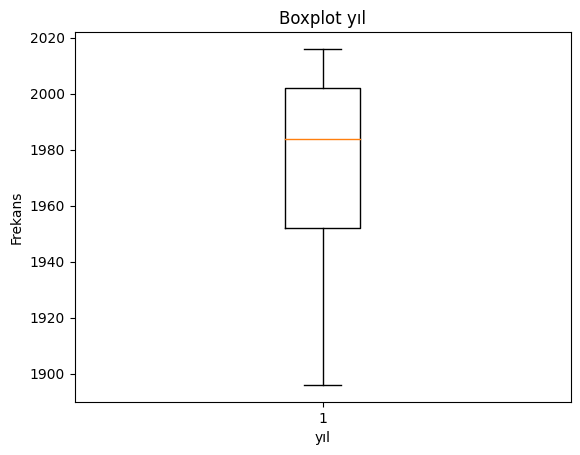

In [215]:
for a in numeric:
    boxplot_n(a)

In [216]:
veri_1.head()

,isim,cinsiyet,yas,boy,kilo,takım,ülke,oyun,yıl,sezon,sehir,spor,etkinlik,madalya
3,Edgar Lindenau Aabye,M,34.0,182.48,95.62,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
37,Arvo Ossian Aaltonen,M,30.0,182.01,76.69,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
38,Arvo Ossian Aaltonen,M,30.0,177.00,75.00,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze
40,Juhamatti Tapio Aaltonen,M,28.0,184.00,85.00,Finland,FIN,2014 Winter,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze
41,Paavo Johannes Aaltonen,M,28.0,175.00,64.00,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze


In [217]:
veri_1.info

<bound method DataFrame.info of                                        isim cinsiyet   yas     boy   kilo  \
3                      Edgar Lindenau Aabye        M  34.0  182.48  95.62   
37                     Arvo Ossian Aaltonen        M  30.0  182.01  76.69   
38                     Arvo Ossian Aaltonen        M  30.0  177.00  75.00   
40                 Juhamatti Tapio Aaltonen        M  28.0  184.00  85.00   
41                  Paavo Johannes Aaltonen        M  28.0  175.00  64.00   
...                                     ...      ...   ...     ...    ...   
271078  Galina Ivanovna Zybina (-Fyodorova)        F  25.0  168.00  80.00   
271080  Galina Ivanovna Zybina (-Fyodorova)        F  33.0  168.00  80.00   
271082                         Bogusaw Zych        M  28.0  182.00  82.00   
271102            Olesya Nikolayevna Zykina        F  19.0  171.00  64.00   
271103            Olesya Nikolayevna Zykina        F  23.0  171.00  64.00   

                 takım ülke         oyun   

In [218]:
def plotBar(degisken , n=5):
    
    veri_ = veri_1[degisken]
    veri_sayma = veri_.value_counts()
    veri_sayma = veri_sayma[:n]
    plt.figure()
    plt.bar(veri_sayma.index,veri_sayma,color="Red")
    plt.xticks(veri_sayma.index,veri_sayma.index.values)
    plt.xticks(rotation=45)
    plt.ylabel("frekans")
    plt.title("veri sıklığı {}".format(degisken))
    plt.show()
    
    

In [219]:
categoric = ["cinsiyet","takım","ülke","oyun","sezon","sehir","spor","etkinlik","madalya"]

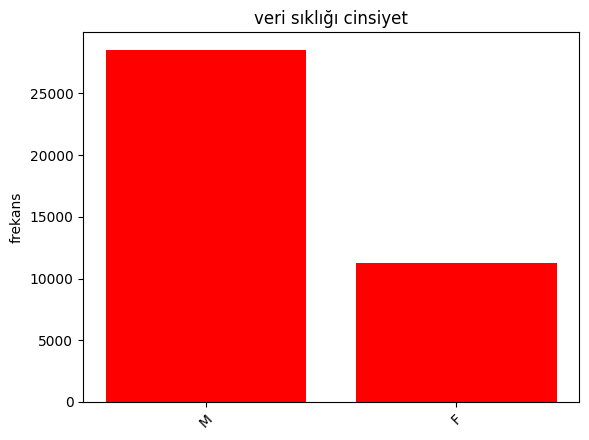

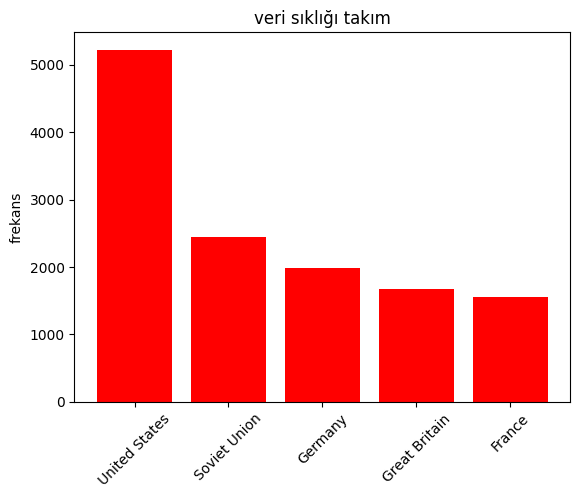

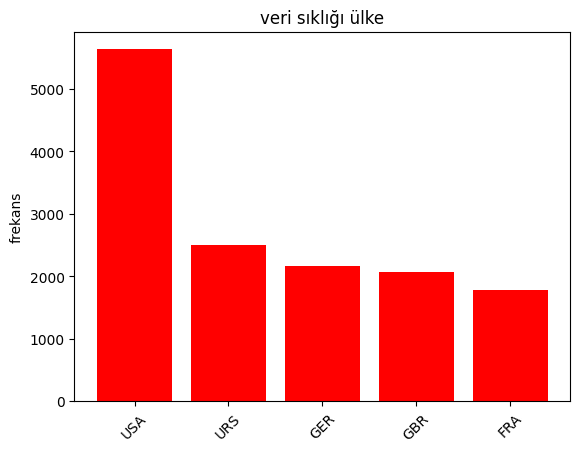

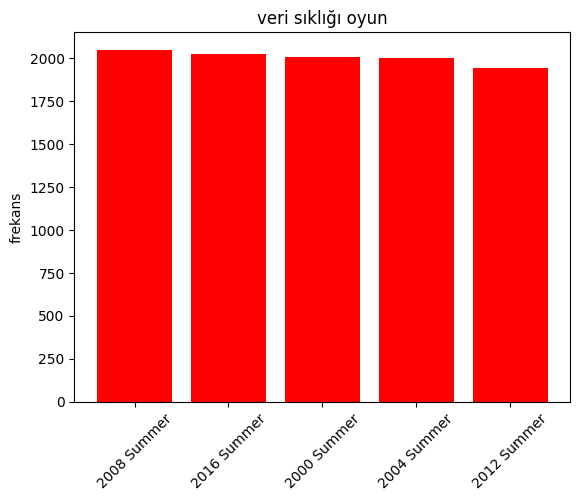

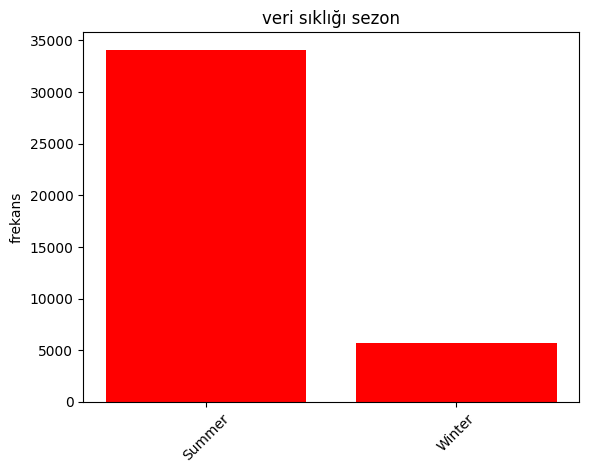

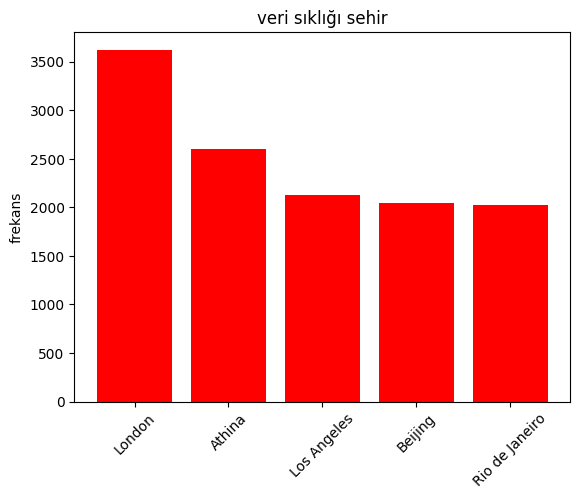

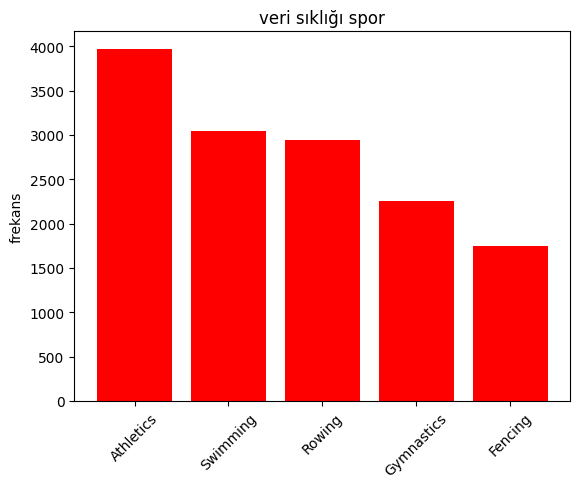

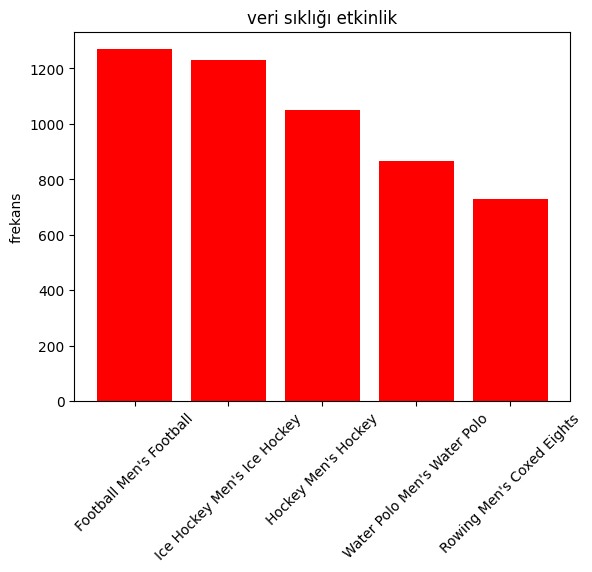

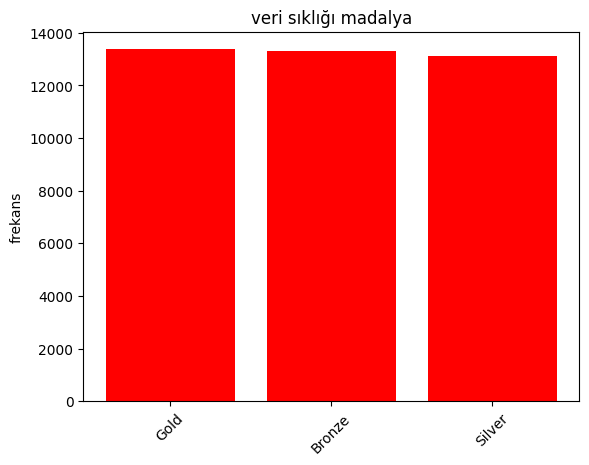

In [220]:
for i in categoric:
    plotBar(i,n=5)

İki Değişkenli Veri Analizi

In [221]:
erkek = veri_1[veri_1.cinsiyet == "M"]
erkek.head()

,isim,cinsiyet,yas,boy,kilo,takım,ülke,oyun,yıl,sezon,sehir,spor,etkinlik,madalya
3,Edgar Lindenau Aabye,M,34.0,182.48,95.62,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
37,Arvo Ossian Aaltonen,M,30.0,182.01,76.69,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
38,Arvo Ossian Aaltonen,M,30.0,177.00,75.00,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze
40,Juhamatti Tapio Aaltonen,M,28.0,184.00,85.00,Finland,FIN,2014 Winter,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze
41,Paavo Johannes Aaltonen,M,28.0,175.00,64.00,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze


In [222]:
kadin = veri_1[veri_1.cinsiyet != "M"]
kadin.head()

,isim,cinsiyet,yas,boy,kilo,takım,ülke,oyun,yıl,sezon,sehir,spor,etkinlik,madalya
79,Ragnhild Margrethe Aamodt,F,27.0,163.00,68.88,Norway,NOR,2008 Summer,2008,Summer,Beijing,Handball,Handball Women's Handball,Gold
91,Willemien Aardenburg,F,22.0,166.13,60.53,Netherlands,NED,1988 Summer,1988,Summer,Seoul,Hockey,Hockey Women's Hockey,Bronze
105,Ann Kristin Aarnes,F,23.0,182.00,64.00,Norway,NOR,1996 Summer,1996,Summer,Atlanta,Football,Football Women's Football,Bronze
161,Patimat Abakarova,F,21.0,165.00,49.00,Azerbaijan,AZE,2016 Summer,2016,Summer,Rio de Janeiro,Taekwondo,Taekwondo Women's Flyweight,Bronze
163,Mariya Vasilyevna Abakumova (-Tarabina),F,22.0,179.00,80.00,Russia,RUS,2008 Summer,2008,Summer,Beijing,Athletics,Athletics Women's Javelin Throw,Silver


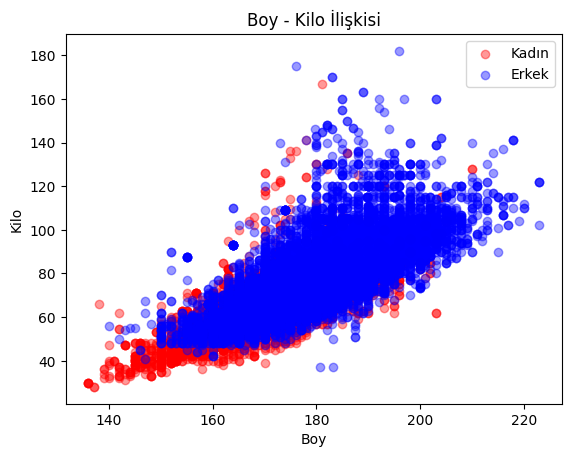

In [223]:
plt.figure()
plt.scatter(kadin.boy,kadin.kilo,alpha=0.4,label="Kadın",c="Red")
plt.scatter(erkek.boy,erkek.kilo,alpha=0.4,label="Erkek",c="Blue")
plt.xlabel("Boy")
plt.ylabel("Kilo")
plt.title("Boy - Kilo İlişkisi")
plt.legend()
plt.show()

In [224]:
# Pozitif ilişki

In [225]:
veri_1.loc[:,["yas","boy","kilo"]].corr()

,yas,boy,kilo
yas,1.000000,0.06204,0.137607
boy,0.062040,1.00000,0.794290
kilo,0.137607,0.79429,1.000000


In [226]:
# Boy ve ilişki arasında pozitif ilişki olduğunu anlıyoruz

In [227]:
veri_copy = veri_1.copy()

In [228]:
veri_copy.head(1)

,isim,cinsiyet,yas,boy,kilo,takım,ülke,oyun,yıl,sezon,sehir,spor,etkinlik,madalya
3,Edgar Lindenau Aabye,M,34.0,182.48,95.62,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold


In [229]:
veri_copy = pd.get_dummies(veri_copy,columns=["madalya"],dtype="int")
veri_copy.head(2)

,isim,cinsiyet,yas,boy,kilo,takım,ülke,oyun,yıl,sezon,sehir,spor,etkinlik,madalya_Bronze,madalya_Gold,madalya_Silver
3,Edgar Lindenau Aabye,M,34.0,182.48,95.62,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,0,1,0
37,Arvo Ossian Aaltonen,M,30.0,182.01,76.69,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,1,0,0


In [230]:
veri_copy.loc[:,["yas","madalya_Bronze","madalya_Gold","madalya_Silver"]].corr()

,yas,madalya_Bronze,madalya_Gold,madalya_Silver
yas,1.000000,-0.005584,-0.002576,0.008192
madalya_Bronze,-0.005584,1.000000,-0.504110,-0.496859
madalya_Gold,-0.002576,-0.504110,1.000000,-0.499022
madalya_Silver,0.008192,-0.496859,-0.499022,1.000000


In [231]:
# Takımların kazandıkları altın , gümüş , bronz madalya oranları

In [232]:
veri_copy[["takım","madalya_Bronze","madalya_Gold","madalya_Silver"]].groupby(["takım"],as_index="False").sum().sort_values(by="madalya_Gold",ascending=False)[:10]

,madalya_Bronze,madalya_Gold,madalya_Silver
takım,,,
United States,1233,2474,1512
Soviet Union,677,1058,716
Germany,678,679,627
Italy,484,535,508
Great Britain,572,519,582
France,577,455,518
Sweden,507,451,476
Hungary,365,432,330
Canada,408,422,413


In [233]:
# Loc gereksizdir çokta kullanmana gerek yok. İstersen kullan ama

In [234]:
# Kazanılan madalyaların hangi şehirlerde kazanıldığı

In [235]:
veri_copy[["sehir","madalya_Bronze","madalya_Gold","madalya_Silver"]].groupby(["sehir"],as_index="False").sum().sort_values(by="madalya_Gold",ascending=False)[:10]

,madalya_Bronze,madalya_Gold,madalya_Silver
sehir,,,
London,1214,1215,1195
Athina,860,883,859
Los Angeles,706,726,691
Beijing,710,671,667
Rio de Janeiro,703,665,655
Sydney,680,663,661
Atlanta,629,608,605
Barcelona,604,559,549
Seoul,549,520,513


In [236]:
# Cinsiyete göre kazanılan madalya sayıları

In [237]:
veri_copy[["cinsiyet","madalya_Bronze","madalya_Gold","madalya_Silver"]].groupby(["cinsiyet"],as_index="False").sum().sort_values(by="madalya_Gold",ascending=False)

,madalya_Bronze,madalya_Gold,madalya_Silver
cinsiyet,,,
M,9524,9625,9381
F,3771,3747,3735


ÇOK DEĞİŞKENLİ VERİ ANALİZİ

In [238]:
# Pivot tablosu
veri_pivot = veri.pivot_table(index="madalya",columns="cinsiyet",
                                  values=["boy","kilo","yas"],
                                  aggfunc={"boy":np.mean,"kilo":np.mean,"yas":[min,max,np.std]})

veri_pivot.head()

boy                   kilo              yas              \
                mean                   mean              max         min   
cinsiyet           F           M          F          M     F     M     F   
madalya                                                                    
Bronze    170.003455  180.046978  62.758422  77.856463  69.0  72.0  12.0   
Gold      170.449103  180.320728  63.201297  78.207376  63.0  64.0  13.0   
Silver    170.233973  180.055230  62.868179  77.979809  55.0  73.0  11.0   

                                    
                     std            
cinsiyet     M         F         M  
madalya                             
Bronze    10.0  5.334748  5.957346  
Gold      13.0  5.221598  6.032316  
Silver    13.0  5.257146  6.191528

Anomali Tespiti - Aykırı Değer

In [239]:
from collections import Counter

In [240]:
liste = [1,2,2,2,3,4,5,5]

liste_1 = Counter(liste)

print(liste_1)

Counter({2: 3, 5: 2, 1: 1, 3: 1, 4: 1})


In [241]:
def anomaliDedect(df,feature):
    outlier_indices = []
    
    for c in feature:
        #1. ceyrek
        Q1 = np.percentile(df[c],25)
        #3. ceyrek
        Q3 = np.percentile(df[c],75)
        
        IQR = Q3 - Q1 
        
        outlier_step = IQR * 1.5
        
        # aykırı değer ve bulunduğu index tespiti
        
        outlier_list_col = df[(df[c] < Q1 - outlier_step) | (df[c] > Q3 + outlier_step)].index
        
        outlier_indices.extend(outlier_list_col)
        
    # Eşsiz aykırı değerleri bulalım
    outlier_indices = Counter(outlier_indices)
    
    multiple_outliers = list(i for i, v in outlier_indices.items() if v > 1)
    
    return multiple_outliers

In [242]:
veri_copy.columns

Index(['isim', 'cinsiyet', 'yas', 'boy', 'kilo', 'takım', 'ülke', 'oyun',
       'yıl', 'sezon', 'sehir', 'spor', 'etkinlik', 'madalya_Bronze',
       'madalya_Gold', 'madalya_Silver'],
      dtype='object')

In [243]:
veri_anomali = veri.loc[anomaliDedect(veri_copy,["yas","kilo","boy"])]
print(veri_anomali.spor.value_counts())
print(veri_anomali.spor.size)
print(veri_anomali.spor.value_counts().size)
veri_anomali.spor

spor
Basketball        64
Gymnastics        34
Handball           6
Athletics          5
Sailing            3
Diving             3
Shooting           1
Figure Skating     1
Wrestling          1
Name: count, dtype: int64
118
9


48127       Shooting
139072       Sailing
154308     Athletics
154522     Athletics
192604       Sailing
             ...    
270120    Basketball
270121    Basketball
270182    Gymnastics
270740    Basketball
270741    Basketball
Name: spor, Length: 118, dtype: object

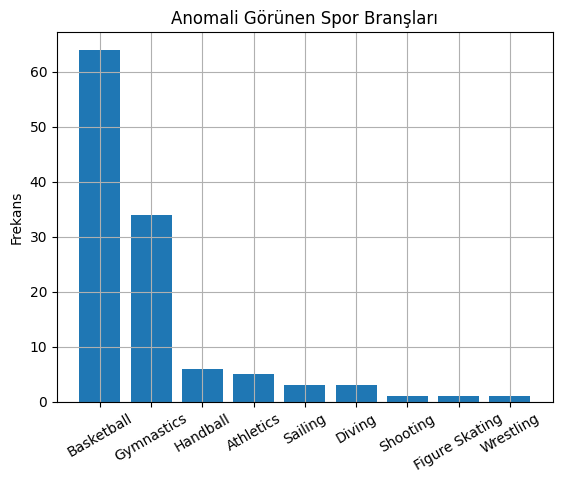

In [244]:
plt.figure()
plt.bar(veri_anomali.spor.value_counts().index,veri_anomali.spor.value_counts())
plt.xticks(veri_anomali.spor.value_counts().index,veri_anomali.spor.value_counts().index.values)
plt.xticks(rotation=30)
plt.title('Anomali Görünen Spor Branşları')
plt.ylabel("Frekans")
plt.grid()
plt.show()

In [245]:
veri_gym = veri_anomali[(veri_anomali.spor == "Gymnastics")]

print("Toplam anomali jimnastikci sayısı: {}".format(veri_gym.value_counts().size))

veri_gym_1 = veri_anomali[(veri_anomali.spor == "Gymnastics") & (veri_anomali.cinsiyet == "F")]

print("Toplam anomali kadın jimnastikci sayısı: {}".format(veri_gym_1.value_counts().size))




veri_bgym = veri_anomali[(veri_anomali.spor == "Basketball") & (veri_anomali.cinsiyet== "M")]
veri_bgym_1=veri_anomali[(veri_anomali.spor == "Basketball")]

print("Toplam anomali basketbolcu sayısı: {}".format(veri_anomali[(veri_anomali.spor == "Basketball")].value_counts().size))

print("Toplam anomali basketbolcu erkek sayısı: {}".format(veri_bgym.value_counts().size))

Toplam anomali jimnastikci sayısı: 34
Toplam anomali kadın jimnastikci sayısı: 34
Toplam anomali basketbolcu sayısı: 64
Toplam anomali basketbolcu erkek sayısı: 62


In [246]:
veri_gym

,isim,cinsiyet,yas,boy,kilo,takım,ülke,oyun,yıl,sezon,sehir,spor,etkinlik,madalya
13741,Oana Mihaela Ban,F,18.0,139.0,36.0,Romania,ROU,2004 Summer,2004,Summer,Athina,Gymnastics,Gymnastics Women's Team All-Around,Gold
21260,Bi Wenjing,F,14.0,142.0,35.0,China,CHN,1996 Summer,1996,Summer,Atlanta,Gymnastics,Gymnastics Women's Uneven Bars,Silver
23763,Loredana Boboc,F,16.0,139.0,32.0,Romania,ROU,2000 Summer,2000,Summer,Sydney,Gymnastics,Gymnastics Women's Team All-Around,Gold
47452,Laura Cutina,F,15.0,143.0,36.0,Romania,ROU,1984 Summer,1984,Summer,Los Angeles,Gymnastics,Gymnastics Women's Team All-Around,Gold
53751,Deng Linlin,F,16.0,144.0,34.0,China,CHN,2008 Summer,2008,Summer,Beijing,Gymnastics,Gymnastics Women's Team All-Around,Gold
53759,Deng Linlin,F,20.0,144.0,34.0,China,CHN,2012 Summer,2012,Summer,London,Gymnastics,Gymnastics Women's Balance Beam,Gold
69216,Mariya Yevgenyevna Filatova (-Kurbatova),F,14.0,136.0,30.0,Soviet Union,URS,1976 Summer,1976,Summer,Montreal,Gymnastics,Gymnastics Women's Team All-Around,Gold
69222,Mariya Yevgenyevna Filatova (-Kurbatova),F,19.0,136.0,30.0,Soviet Union,URS,1980 Summer,1980,Summer,Moskva,Gymnastics,Gymnastics Women's Team All-Around,Gold
69225,Mariya Yevgenyevna Filatova (-Kurbatova),F,19.0,136.0,30.0,Soviet Union,URS,1980 Summer,1980,Summer,Moskva,Gymnastics,Gymnastics Women's Uneven Bars,Bronze
80497,Maxi Gnauck,F,15.0,148.0,33.0,East Germany,GDR,1980 Summer,1980,Summer,Moskva,Gymnastics,Gymnastics Women's Individual All-Around,Silver


In [247]:
veri_gym.size

476

In [248]:
veri_gym = veri_anomali[(veri_anomali.spor == "Gymnastics")]["spor"]
print(veri_gym.size)


34


In [249]:
veri_gym.value_counts()

spor
Gymnastics    34
Name: count, dtype: int64

In [250]:
# Göründüğü üzere gymnastic için anomali değerlerin çoğunu kadınlar oluştururken , basketbol içinse erkekler oluşturmaktadır.

In [251]:
veri_bgym_1.etkinlik.value_counts()

etkinlik
Basketball Men's Basketball      62
Basketball Women's Basketball     2
Name: count, dtype: int64

Zaman Serilerinde Veri Analizi

In [252]:
# * yıllara göre ortalama yaş , boy , kilo
# * yıllara göre madalya sayıları

In [253]:
veri_zaman = veri_1

In [254]:
veri_zaman.head(3)

,isim,cinsiyet,yas,boy,kilo,takım,ülke,oyun,yıl,sezon,sehir,spor,etkinlik,madalya
3,Edgar Lindenau Aabye,M,34.0,182.48,95.62,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
37,Arvo Ossian Aaltonen,M,30.0,182.01,76.69,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
38,Arvo Ossian Aaltonen,M,30.0,177.00,75.00,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze


In [255]:
essiz_yillar = veri_zaman.yıl.unique()
essiz_yillar

array([1900, 1920, 2014, 1948, 1952, 1992, 1994, 2002, 2006, 2008, 1988,
       1996, 1960, 1912, 1956, 2016, 2012, 2000, 2004, 1980, 1984, 1936,
       1906, 1964, 1972, 1924, 1904, 1932, 1928, 1968, 1976, 2010, 1908,
       1998, 1896], dtype=int64)

In [256]:
dizili_yillar = np.sort(essiz_yillar)[::-1]
dizili_yillar

array([2016, 2014, 2012, 2010, 2008, 2006, 2004, 2002, 2000, 1998, 1996,
       1994, 1992, 1988, 1984, 1980, 1976, 1972, 1968, 1964, 1960, 1956,
       1952, 1948, 1936, 1932, 1928, 1924, 1920, 1912, 1908, 1906, 1904,
       1900, 1896], dtype=int64)

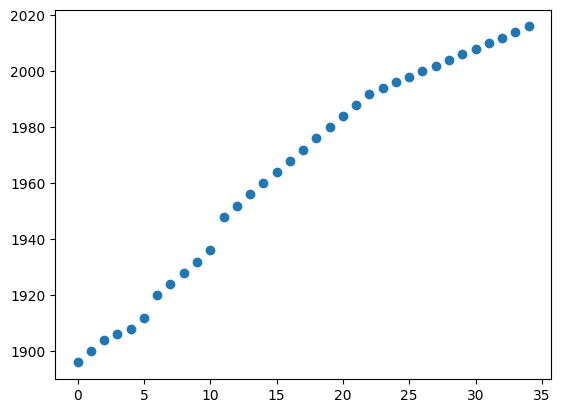

In [257]:
plt.figure()
plt.scatter(range(len(dizili_yillar)),dizili_yillar[::-1])
plt.show()

In [258]:
# veri içerisinden bulunan yıl değerlerini datetime veri tipine dönüştürelim

In [259]:
dönüstürülmüs_zaman = pd.to_datetime(veri_zaman["yıl"], format= "%Y")
print(dönüstürülmüs_zaman.head(3))
print(type(dönüstürülmüs_zaman))

3    1900-01-01
37   1920-01-01
38   1920-01-01
Name: yıl, dtype: datetime64[ns]
<class 'pandas.core.series.Series'>


In [260]:
veri_zaman["tarih_saat"] = dönüstürülmüs_zaman

In [261]:
veri_zaman.head(3)

,isim,cinsiyet,yas,boy,kilo,takım,ülke,oyun,yıl,sezon,sehir,spor,etkinlik,madalya,tarih_saat
3,Edgar Lindenau Aabye,M,34.0,182.48,95.62,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,1900-01-01
37,Arvo Ossian Aaltonen,M,30.0,182.01,76.69,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze,1920-01-01
38,Arvo Ossian Aaltonen,M,30.0,177.00,75.00,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze,1920-01-01


In [262]:
veri_zaman.index = veri_zaman.tarih_saat
# olası başka çözüm
# veri_zaman = veri_zaman.set_index("tarih_saat")

In [263]:
veri_zaman.head(3)

,isim,cinsiyet,yas,boy,kilo,takım,ülke,oyun,yıl,sezon,sehir,spor,etkinlik,madalya,tarih_saat
tarih_saat,,,,,,,,,,,,,,,
1900-01-01,Edgar Lindenau Aabye,M,34.0,182.48,95.62,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,1900-01-01
1920-01-01,Arvo Ossian Aaltonen,M,30.0,182.01,76.69,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze,1920-01-01
1920-01-01,Arvo Ossian Aaltonen,M,30.0,177.00,75.00,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze,1920-01-01


In [264]:
veri_zaman.drop(columns=["tarih_saat"],axis=1,inplace=True)

In [265]:
veri_zaman.head(3)

,isim,cinsiyet,yas,boy,kilo,takım,ülke,oyun,yıl,sezon,sehir,spor,etkinlik,madalya
tarih_saat,,,,,,,,,,,,,,
1900-01-01,Edgar Lindenau Aabye,M,34.0,182.48,95.62,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
1920-01-01,Arvo Ossian Aaltonen,M,30.0,182.01,76.69,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
1920-01-01,Arvo Ossian Aaltonen,M,30.0,177.00,75.00,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze


In [266]:
veri_zaman.drop(columns=["yıl"],axis=1,inplace=True)

In [267]:
veri_zaman.head(3)

,isim,cinsiyet,yas,boy,kilo,takım,ülke,oyun,sezon,sehir,spor,etkinlik,madalya
tarih_saat,,,,,,,,,,,,,
1900-01-01,Edgar Lindenau Aabye,M,34.0,182.48,95.62,Denmark/Sweden,DEN,1900 Summer,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
1920-01-01,Arvo Ossian Aaltonen,M,30.0,182.01,76.69,Finland,FIN,1920 Summer,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
1920-01-01,Arvo Ossian Aaltonen,M,30.0,177.00,75.00,Finland,FIN,1920 Summer,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze


In [268]:
veri_zaman

,isim,cinsiyet,yas,boy,kilo,takım,ülke,oyun,sezon,sehir,spor,etkinlik,madalya
tarih_saat,,,,,,,,,,,,,
1900-01-01,Edgar Lindenau Aabye,M,34.0,182.48,95.62,Denmark/Sweden,DEN,1900 Summer,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
1920-01-01,Arvo Ossian Aaltonen,M,30.0,182.01,76.69,Finland,FIN,1920 Summer,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
1920-01-01,Arvo Ossian Aaltonen,M,30.0,177.00,75.00,Finland,FIN,1920 Summer,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze
2014-01-01,Juhamatti Tapio Aaltonen,M,28.0,184.00,85.00,Finland,FIN,2014 Winter,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze
1948-01-01,Paavo Johannes Aaltonen,M,28.0,175.00,64.00,Finland,FIN,1948 Summer,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1956-01-01,Galina Ivanovna Zybina (-Fyodorova),F,25.0,168.00,80.00,Soviet Union,URS,1956 Summer,Summer,Melbourne,Athletics,Athletics Women's Shot Put,Silver
1964-01-01,Galina Ivanovna Zybina (-Fyodorova),F,33.0,168.00,80.00,Soviet Union,URS,1964 Summer,Summer,Tokyo,Athletics,Athletics Women's Shot Put,Bronze
1980-01-01,Bogusaw Zych,M,28.0,182.00,82.00,Poland,POL,1980 Summer,Summer,Moskva,Fencing,"Fencing Men's Foil, Team",Bronze


In [269]:
veri_zaman.drop(columns=["oyun"],axis=1,inplace=True)
veri_zaman.head(3)

,isim,cinsiyet,yas,boy,kilo,takım,ülke,sezon,sehir,spor,etkinlik,madalya
tarih_saat,,,,,,,,,,,,
1900-01-01,Edgar Lindenau Aabye,M,34.0,182.48,95.62,Denmark/Sweden,DEN,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
1920-01-01,Arvo Ossian Aaltonen,M,30.0,182.01,76.69,Finland,FIN,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
1920-01-01,Arvo Ossian Aaltonen,M,30.0,177.00,75.00,Finland,FIN,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze


In [270]:
veri_zaman

,isim,cinsiyet,yas,boy,kilo,takım,ülke,sezon,sehir,spor,etkinlik,madalya
tarih_saat,,,,,,,,,,,,
1900-01-01,Edgar Lindenau Aabye,M,34.0,182.48,95.62,Denmark/Sweden,DEN,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
1920-01-01,Arvo Ossian Aaltonen,M,30.0,182.01,76.69,Finland,FIN,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
1920-01-01,Arvo Ossian Aaltonen,M,30.0,177.00,75.00,Finland,FIN,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze
2014-01-01,Juhamatti Tapio Aaltonen,M,28.0,184.00,85.00,Finland,FIN,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze
1948-01-01,Paavo Johannes Aaltonen,M,28.0,175.00,64.00,Finland,FIN,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze
...,...,...,...,...,...,...,...,...,...,...,...,...
1956-01-01,Galina Ivanovna Zybina (-Fyodorova),F,25.0,168.00,80.00,Soviet Union,URS,Summer,Melbourne,Athletics,Athletics Women's Shot Put,Silver
1964-01-01,Galina Ivanovna Zybina (-Fyodorova),F,33.0,168.00,80.00,Soviet Union,URS,Summer,Tokyo,Athletics,Athletics Women's Shot Put,Bronze
1980-01-01,Bogusaw Zych,M,28.0,182.00,82.00,Poland,POL,Summer,Moskva,Fencing,"Fencing Men's Foil, Team",Bronze


In [271]:
# Yıllara göre ortalama yaş boy kilo değişimi

In [272]:
zaman = veri_zaman.index

In [273]:
veri_zaman["kilo"].index

DatetimeIndex(['1900-01-01', '1920-01-01', '1920-01-01', '2014-01-01',
               '1948-01-01', '1948-01-01', '1948-01-01', '1948-01-01',
               '1952-01-01', '1992-01-01',
               ...
               '1996-01-01', '1980-01-01', '1992-01-01', '1996-01-01',
               '1952-01-01', '1956-01-01', '1964-01-01', '1980-01-01',
               '2000-01-01', '2004-01-01'],
              dtype='datetime64[ns]', name='tarih_saat', length=39783, freq=None)

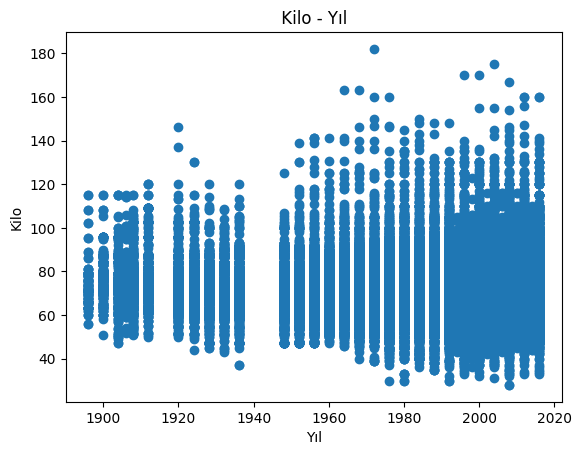

In [274]:
plt.figure()
plt.scatter(veri_zaman.index,veri_zaman["kilo"])
plt.title(" Kilo - Yıl ")
plt.xlabel("Yıl")
plt.ylabel("Kilo")
plt.show()

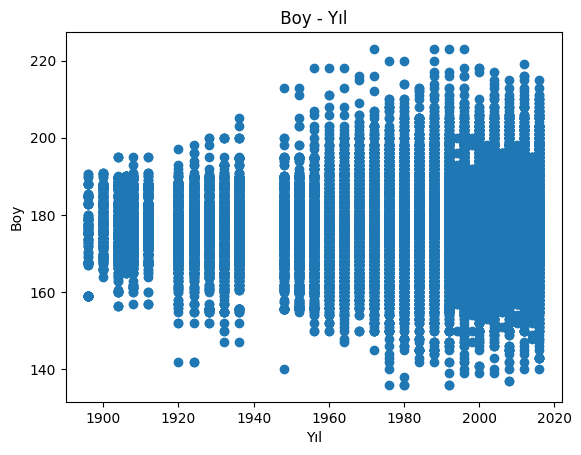

In [275]:
plt.figure()
plt.scatter(veri_zaman.index,veri_zaman["boy"])
plt.title(" Boy - Yıl ")
plt.xlabel("Yıl")
plt.ylabel("Boy")
plt.show()

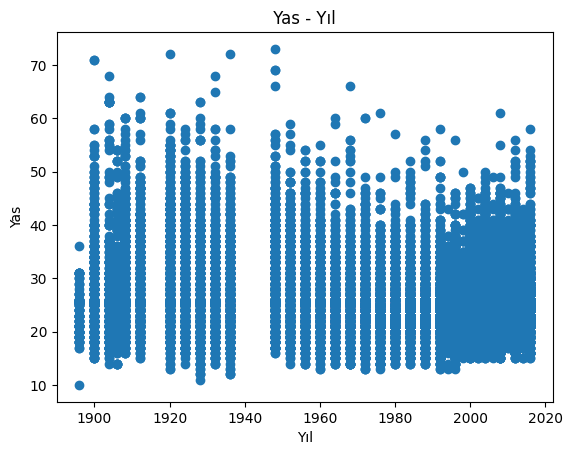

In [276]:
plt.figure()
plt.scatter(veri_zaman.index,veri_zaman["yas"])
plt.title(" Yas - Yıl ")
plt.xlabel("Yıl")
plt.ylabel("Yas")
plt.show()

In [277]:
periyodik_ortalama=veri_zaman[["yas","boy","kilo"]].resample("1A").mean()
periyodik_ortalama.head(10)

,yas,boy,kilo
tarih_saat,,,
1896-12-31,23.905734,174.294056,72.814336
1897-12-31,NaN,NaN,NaN
1898-12-31,NaN,NaN,NaN
1899-12-31,NaN,NaN,NaN
1900-12-31,27.786689,177.907235,75.145083
1901-12-31,NaN,NaN,NaN
1902-12-31,NaN,NaN,NaN
1903-12-31,NaN,NaN,NaN
1904-12-31,26.363868,177.244753,74.416461


In [278]:
periyodik_ortalama.dropna(axis=0,inplace=True)
periyodik_ortalama.head()

,yas,boy,kilo
tarih_saat,,,
1896-12-31,23.905734,174.294056,72.814336
1900-12-31,27.786689,177.907235,75.145083
1904-12-31,26.363868,177.244753,74.416461
1906-12-31,26.479389,176.366048,74.172140
1908-12-31,27.566739,176.665836,73.798339


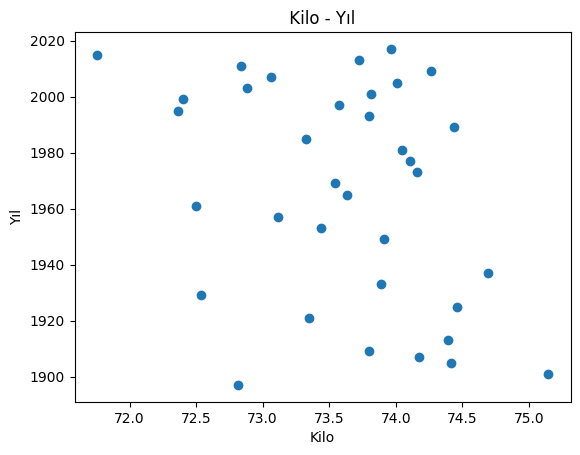

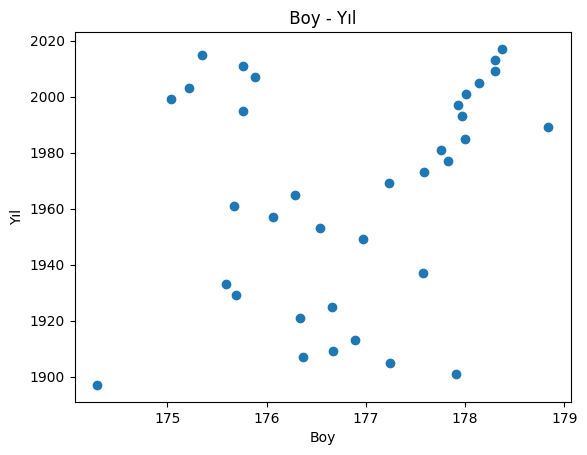

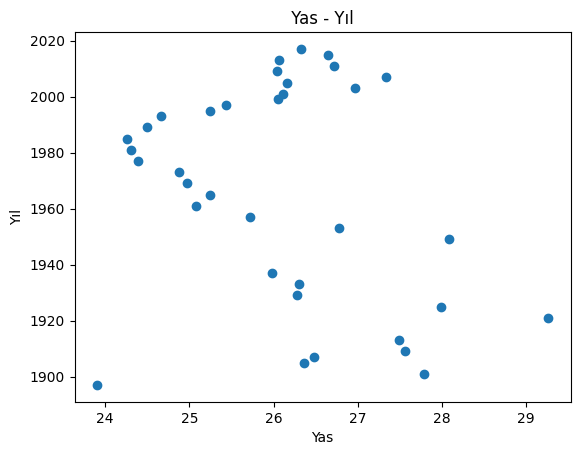

In [279]:
periyodik_kilo = periyodik_ortalama=veri_zaman["kilo"].resample("1A").mean()
periyodik_boy = periyodik_ortalama=veri_zaman["boy"].resample("1A").mean()
periyodik_yas = periyodik_ortalama=veri_zaman["yas"].resample("1A").mean()


plt.figure()
plt.scatter(periyodik_kilo,periyodik_kilo.index)
plt.title(" Kilo - Yıl ")
plt.xlabel("Kilo")
plt.ylabel("Yıl")
plt.show()

plt.figure()
plt.scatter(periyodik_boy,periyodik_boy.index)
plt.title(" Boy - Yıl ")
plt.xlabel("Boy")
plt.ylabel("Yıl")
plt.show()


plt.figure()
plt.scatter(periyodik_yas,periyodik_yas.index)
plt.title(" Yas - Yıl ")
plt.xlabel("Yas")
plt.ylabel("Yıl")
plt.show()

In [280]:
# Görüldüğü üzere kilo konusunda yıllar üzerine pek çıkarım yapılamamıştır.
# Yıllara göre boya bakılacak olursa ise 80'li yıllardan sonra boyda bir artış görülmektedir.
# yaşa bakıldığında ise son yıllarda yaşın düştüğü görülmektedir.

In [281]:
# Yıllara Göre Madalya Sayıları

In [282]:
veri_zaman.head()

,isim,cinsiyet,yas,boy,kilo,takım,ülke,sezon,sehir,spor,etkinlik,madalya
tarih_saat,,,,,,,,,,,,
1900-01-01,Edgar Lindenau Aabye,M,34.0,182.48,95.62,Denmark/Sweden,DEN,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
1920-01-01,Arvo Ossian Aaltonen,M,30.0,182.01,76.69,Finland,FIN,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
1920-01-01,Arvo Ossian Aaltonen,M,30.0,177.00,75.00,Finland,FIN,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze
2014-01-01,Juhamatti Tapio Aaltonen,M,28.0,184.00,85.00,Finland,FIN,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze
1948-01-01,Paavo Johannes Aaltonen,M,28.0,175.00,64.00,Finland,FIN,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze


In [283]:
madalya_s = veri_zaman.groupby("madalya")

In [284]:
yillara_gore_madalya_sayisi = veri_zaman.groupby(veri_zaman.index)['madalya'].count()


In [285]:
yillara_gore_madalya_sayisi

tarih_saat
1896-01-01     143
1900-01-01     604
1904-01-01     486
1906-01-01     458
1908-01-01     831
1912-01-01     941
1920-01-01    1308
1924-01-01     962
1928-01-01     823
1932-01-01     739
1936-01-01    1025
1948-01-01     987
1952-01-01    1033
1956-01-01    1043
1960-01-01    1058
1964-01-01    1215
1968-01-01    1256
1972-01-01    1414
1976-01-01    1531
1980-01-01    1602
1984-01-01    1698
1988-01-01    1845
1992-01-01    2030
1994-01-01     331
1996-01-01    1842
1998-01-01     440
2000-01-01    2004
2002-01-01     478
2004-01-01    2001
2006-01-01     526
2008-01-01    2048
2010-01-01     520
2012-01-01    1941
2014-01-01     597
2016-01-01    2023
Name: madalya, dtype: int64

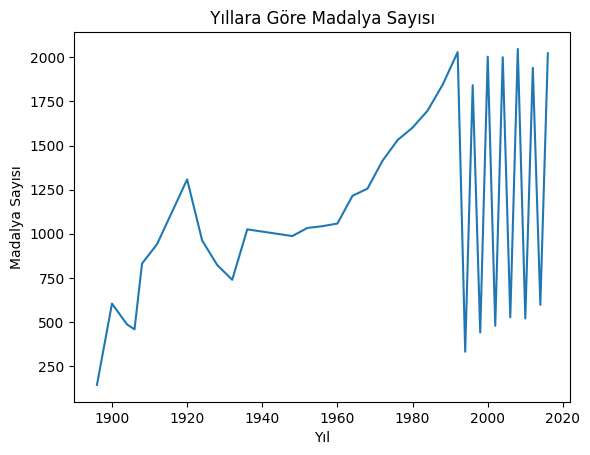

In [296]:
plt.figure()
plt.plot(yillara_gore_madalya_sayisi.index,yillara_gore_madalya_sayisi)
plt.title(" Yıllara Göre Madalya Sayısı ")
plt.xlabel("Yıl")
plt.ylabel("Madalya Sayısı")
plt.show()

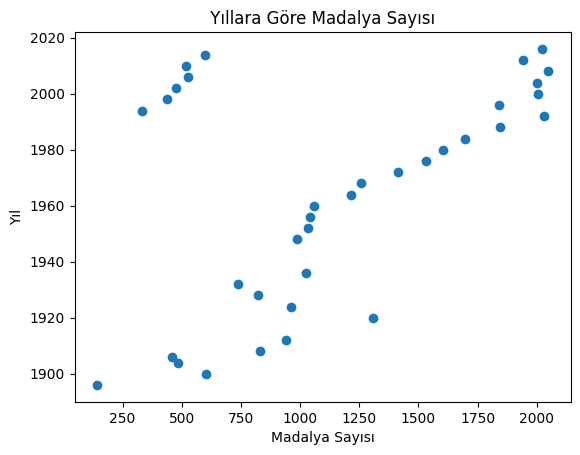

In [286]:
plt.figure()
plt.scatter(yillara_gore_madalya_sayisi,yillara_gore_madalya_sayisi.index)
plt.title(" Yıllara Göre Madalya Sayısı ")
plt.xlabel("Madalya Sayısı")
plt.ylabel("Yıl")
plt.show()

In [287]:
veri_zaman_1 = pd.get_dummies(veri_zaman,columns=["madalya"],dtype="int")
veri_zaman_1.head(3)

,isim,cinsiyet,yas,boy,kilo,takım,ülke,sezon,sehir,spor,etkinlik,madalya_Bronze,madalya_Gold,madalya_Silver
tarih_saat,,,,,,,,,,,,,,
1900-01-01,Edgar Lindenau Aabye,M,34.0,182.48,95.62,Denmark/Sweden,DEN,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,0,1,0
1920-01-01,Arvo Ossian Aaltonen,M,30.0,182.01,76.69,Finland,FIN,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,1,0,0
1920-01-01,Arvo Ossian Aaltonen,M,30.0,177.00,75.00,Finland,FIN,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,1,0,0


In [288]:
periyodik_madalya = veri_zaman_1[["madalya_Bronze","madalya_Gold","madalya_Silver"]].resample("1A").sum()

In [289]:
periyodik_madalya

,madalya_Bronze,madalya_Gold,madalya_Silver
tarih_saat,,,
1896-12-31,38,62,43
1897-12-31,0,0,0
1898-12-31,0,0,0
1899-12-31,0,0,0
1900-12-31,175,201,228
...,...,...,...
2012-12-31,679,632,630
2013-12-31,0,0,0
2014-12-31,198,202,197


In [290]:
periyodik_madalya = periyodik_madalya[periyodik_madalya["madalya_Bronze"] != 0]


In [291]:
periyodik_madalya

,madalya_Bronze,madalya_Gold,madalya_Silver
tarih_saat,,,
1896-12-31,38,62,43
1900-12-31,175,201,228
1904-12-31,150,173,163
1906-12-31,145,157,156
1908-12-31,256,294,281
1912-12-31,300,326,315
1920-12-31,367,493,448
1924-12-31,311,332,319
1928-12-31,281,275,267


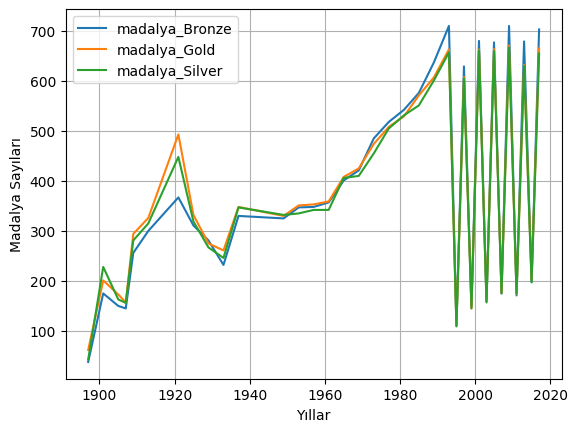

In [304]:
plt.figure()
plt.plot(periyodik_madalya.index,periyodik_madalya)
plt.xlabel("Yıllar")
plt.ylabel("Madalya Sayıları")
plt.grid(True)
plt.legend(["madalya_Bronze","madalya_Gold","madalya_Silver"])
plt.show()

In [305]:
# Yıllara ve sezonlara göre madalya sayıları

In [307]:
veri_zaman_1.head(3)

,isim,cinsiyet,yas,boy,kilo,takım,ülke,sezon,sehir,spor,etkinlik,madalya_Bronze,madalya_Gold,madalya_Silver
tarih_saat,,,,,,,,,,,,,,
1900-01-01,Edgar Lindenau Aabye,M,34.0,182.48,95.62,Denmark/Sweden,DEN,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,0,1,0
1920-01-01,Arvo Ossian Aaltonen,M,30.0,182.01,76.69,Finland,FIN,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,1,0,0
1920-01-01,Arvo Ossian Aaltonen,M,30.0,177.00,75.00,Finland,FIN,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,1,0,0


In [308]:
veri_season = pd.get_dummies(veri_zaman_1,columns=["sezon"],dtype="int")
veri_season.head(3)

,isim,cinsiyet,yas,boy,kilo,takım,ülke,sehir,spor,etkinlik,madalya_Bronze,madalya_Gold,madalya_Silver,sezon_Summer,sezon_Winter
tarih_saat,,,,,,,,,,,,,,,
1900-01-01,Edgar Lindenau Aabye,M,34.0,182.48,95.62,Denmark/Sweden,DEN,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,0,1,0,1,0
1920-01-01,Arvo Ossian Aaltonen,M,30.0,182.01,76.69,Finland,FIN,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,1,0,0,1,0
1920-01-01,Arvo Ossian Aaltonen,M,30.0,177.00,75.00,Finland,FIN,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,1,0,0,1,0


In [312]:
veri_season.tail(2)

,isim,cinsiyet,yas,boy,kilo,takım,ülke,sehir,spor,etkinlik,madalya_Bronze,madalya_Gold,madalya_Silver,sezon_Summer,sezon_Winter
tarih_saat,,,,,,,,,,,,,,,
2000-01-01,Olesya Nikolayevna Zykina,F,19.0,171.0,64.0,Russia,RUS,Sydney,Athletics,Athletics Women's 4 x 400 metres Relay,1,0,0,1,0
2004-01-01,Olesya Nikolayevna Zykina,F,23.0,171.0,64.0,Russia,RUS,Athina,Athletics,Athletics Women's 4 x 400 metres Relay,0,0,1,1,0


In [321]:
print("Kış sezonu sayısı: ",len(veri_season[veri_season["sezon_Winter"] == 1]))
print("Yaz sezonu sayısı: ",len(veri_season[veri_season["sezon_Winter"] != 1]))

Kış sezonu sayısı:  5695
Yaz sezonu sayısı:  34088


In [328]:
periyodik_season = veri_season[["sezon_Winter","sezon_Summer"]].resample("1A").sum()
periyodik_season.dropna(axis=0)


,sezon_Winter,sezon_Summer
tarih_saat,,
1896-12-31,0,143
1897-12-31,0,0
1898-12-31,0,0
1899-12-31,0,0
1900-12-31,0,604
...,...,...
2012-12-31,0,1941
2013-12-31,0,0
2014-12-31,597,0


In [331]:
yaz = veri_zaman_1[veri_zaman["sezon"] == "Summer"]
kis = veri_zaman_1[veri_zaman["sezon"] == "Winter"]

In [332]:
yaz.head(3)

,isim,cinsiyet,yas,boy,kilo,takım,ülke,sezon,sehir,spor,etkinlik,madalya_Bronze,madalya_Gold,madalya_Silver
tarih_saat,,,,,,,,,,,,,,
1900-01-01,Edgar Lindenau Aabye,M,34.0,182.48,95.62,Denmark/Sweden,DEN,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,0,1,0
1920-01-01,Arvo Ossian Aaltonen,M,30.0,182.01,76.69,Finland,FIN,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,1,0,0
1920-01-01,Arvo Ossian Aaltonen,M,30.0,177.00,75.00,Finland,FIN,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,1,0,0


In [334]:
kis.head(3)

,isim,cinsiyet,yas,boy,kilo,takım,ülke,sezon,sehir,spor,etkinlik,madalya_Bronze,madalya_Gold,madalya_Silver
tarih_saat,,,,,,,,,,,,,,
2014-01-01,Juhamatti Tapio Aaltonen,M,28.0,184.0,85.0,Finland,FIN,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,1,0,0
1992-01-01,Kjetil Andr Aamodt,M,20.0,176.0,85.0,Norway,NOR,Winter,Albertville,Alpine Skiing,Alpine Skiing Men's Super G,0,1,0
1992-01-01,Kjetil Andr Aamodt,M,20.0,176.0,85.0,Norway,NOR,Winter,Albertville,Alpine Skiing,Alpine Skiing Men's Giant Slalom,1,0,0


In [338]:
periyodik_yaz = yaz[["madalya_Bronze","madalya_Gold","madalya_Silver"]].resample("1A").sum()
periyodik_yaz= periyodik_yaz[periyodik_yaz["madalya_Bronze"] != 0]
periyodik_yaz

,madalya_Bronze,madalya_Gold,madalya_Silver
tarih_saat,,,
1896-12-31,38,62,43
1900-12-31,175,201,228
1904-12-31,150,173,163
1906-12-31,145,157,156
1908-12-31,256,294,281
1912-12-31,300,326,315
1920-12-31,367,493,448
1924-12-31,274,277,281
1928-12-31,250,245,239


In [339]:
periyodik_kis = kis[["madalya_Bronze","madalya_Gold","madalya_Silver"]].resample("1A").sum()
periyodik_kis = periyodik_kis[periyodik_kis["madalya_Bronze"] != 0]
periyodik_kis

,madalya_Bronze,madalya_Gold,madalya_Silver
tarih_saat,,,
1924-12-31,37,55,38
1928-12-31,31,30,28
1932-12-31,28,32,32
1936-12-31,35,36,37
1948-12-31,46,41,48
1952-12-31,47,45,44
1956-12-31,50,51,49
1960-12-31,49,50,48
1964-12-31,58,61,67


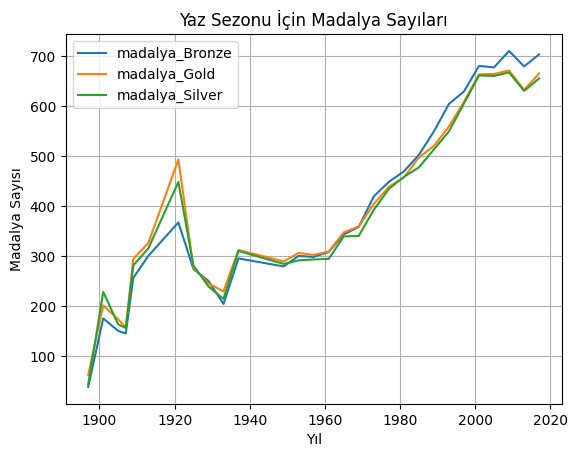

In [341]:
plt.figure()
plt.plot(periyodik_yaz.index,periyodik_yaz)
plt.title("Yaz Sezonu İçin Madalya Sayıları")
plt.xlabel("Yıl")
plt.ylabel("Madalya Sayısı")
plt.grid()
plt.legend(["madalya_Bronze","madalya_Gold","madalya_Silver"])
plt.show()

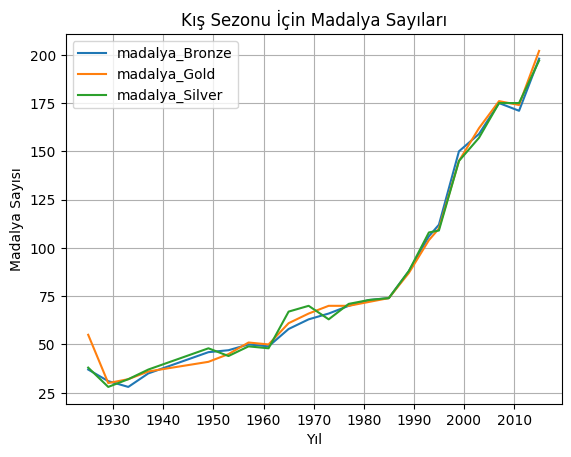

In [342]:
plt.figure()
plt.plot(periyodik_kis.index,periyodik_kis)
plt.title("Kış Sezonu İçin Madalya Sayıları")
plt.xlabel("Yıl")
plt.ylabel("Madalya Sayısı")
plt.grid()
plt.legend(["madalya_Bronze","madalya_Gold","madalya_Silver"])
plt.show()

In [343]:
# Yaz sezonu madalya sayılarının kış sezonundan daha fazla olduğu görülmektedir. Zaten yaz sezonu olimpiyatları sayısıda kış sezonundan fazladır.
# Aynı zamanda yıllar artıkça madalya sayılarının arttığıda görülmektedir.